# Рубежный контроль №1 по курсу "Методы машинного обучения"
Вариант: 2

Выполнил: Арбузов А.П. группа ИУ5-24М

Задание:

Задача №2: Для набора данных проведите кодирование одного (произвольного) категориального признака с использованием метода "target (mean) encoding".

Задача №22: Для набора данных проведите масштабирование данных для одного (произвольного) числового признака с использованием масштабирования по максимальному значению.

Дополнительное условие: Для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders.target_encoder import TargetEncoder as ce_TargetEncoder
%matplotlib inline
sns.set(style="ticks")

age - возраст
workclass - работа
fnlwgt	
education - образование	
education-num - код образования	
marital-status - брак
occupation - наименование работы
relationship - муж/жена/не в браке
race - раса	
sex - пол	
capital-gain - прирост капитала	
capital-loss - снижение капитала	
hours-per-week - занятость в неделю	
native-country - место рождения, Родина
salary - зарплата

In [4]:
loadedData = pd.read_csv('adultData.csv', sep=",")
print("Размер датасета:", loadedData.shape)
loadedData.head()

Размер датасета: (32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data_features = list(zip(
[i for i in loadedData.columns],
zip(
    [str(i) for i in loadedData.dtypes],
    [i for i in loadedData.isnull().sum()]
)))
data_features

[('age', ('int64', 0)),
 ('workclass', ('object', 0)),
 ('fnlwgt', ('int64', 0)),
 ('education', ('object', 0)),
 ('education-num', ('int64', 0)),
 ('marital-status', ('object', 0)),
 ('occupation', ('object', 0)),
 ('relationship', ('object', 0)),
 ('race', ('object', 0)),
 ('sex', ('object', 0)),
 ('capital-gain', ('int64', 0)),
 ('capital-loss', ('int64', 0)),
 ('hours-per-week', ('int64', 0)),
 ('native-country', ('object', 0)),
 ('salary', ('object', 0))]

In [6]:
#Добавим закодированный целевой признак gender_code
dct = {'Female': 0, 'Male': 1}
loadedData['gender_code'] = loadedData['sex'].map(dct)
loadedData.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,gender_code
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [7]:
ce_TargetEncoder1 = ce_TargetEncoder()
loadedData_MEAN_ENC = ce_TargetEncoder1.fit_transform(loadedData[loadedData.columns.difference(['gender_code'])], loadedData['gender_code'])
loadedData_MEAN_ENC.head()

C:\Users\Alexei Arbuzov\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,age,capital-gain,capital-loss,education,education-num,fnlwgt,hours-per-week,marital-status,native-country,occupation,race,relationship,salary,sex,workclass
0,39,2174,0,0.697666,13,77516,40,0.553777,0.668084,0.327056,0.689316,0.533414,0.611974,1.0,0.623267
1,50,0,0,0.697666,13,83311,13,0.889356,0.668084,0.714953,0.689316,0.999924,0.611974,1.0,0.842975
2,38,0,0,0.677174,9,215646,40,0.398605,0.668084,0.880292,0.689316,0.533414,0.611974,1.0,0.658442
3,53,0,0,0.632340,7,234721,40,0.889356,0.668084,0.880292,0.502241,0.999924,0.611974,1.0,0.658442
4,28,0,0,0.697666,13,338409,40,0.889356,0.578947,0.634058,0.502241,0.001276,0.611974,0.0,0.658442


In [8]:
loadedData['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [9]:
loadedData_MEAN_ENC['education'].unique()

array([0.69766573, 0.6771736 , 0.63234043, 0.68891468, 0.71984436,
       0.61514196, 0.6054358 , 0.6382055 , 0.75232198, 0.79176755,
       0.84027778, 0.74774775, 0.68381565, 0.72619048, 0.68627451,
       0.66743649])

<h3><b>Задача №22</b></h3>

In [50]:
#Только числовые признаки
x_col = loadedData.drop(loadedData.columns[[1,3,5,6,7,8,9,10,11,13,14]], axis = 1)
x_fin = x_col.drop('gender_code', axis = 1)
x_fin.head()

,age,fnlwgt,education-num,hours-per-week
0,39,77516,13,40
1,50,83311,13,13
2,38,215646,9,40
3,53,234721,7,40
4,28,338409,13,40


In [51]:
#Функция для восстановления датафрейма на основе масштабирования данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns = x_fin.columns)
    return res

In [52]:
from sklearn.preprocessing import MaxAbsScaler
cs51 = MaxAbsScaler()
data_cs51_scaled_temp = cs51.fit_transform(x_fin)
#Формируем DataFrame
data_cs51_scaled = arr_to_df(data_cs51_scaled_temp)
data_cs51_scaled.describe()

,age,fnlwgt,education-num,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.428685,0.127822,0.630042,0.408459
std,0.151560,0.071092,0.160795,0.124722
min,0.188889,0.008274,0.062500,0.010101
25%,0.311111,0.079361,0.562500,0.404040
50%,0.411111,0.120129,0.625000,0.404040
75%,0.533333,0.159662,0.750000,0.454545
max,1.000000,1.000000,1.000000,1.000000


<h3><b>Дополнительное условие</b></h3>

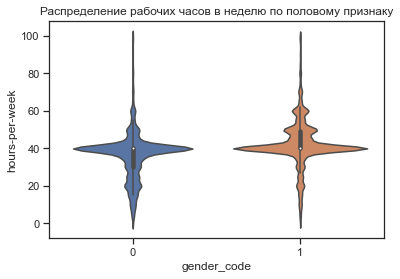

In [36]:
fig, ax = plt.subplots()

xdata = loadedData["gender_code"].astype(str).astype(int)
ydata = loadedData["hours-per-week"].astype(str).astype(int)

ax = sns.violinplot(x = xdata, y = ydata)

ax.set_title('Распределение рабочих часов в неделю по половому признаку')
plt.show()

# Male  - 1
# Female  - 0